# Implement Decision Tree

# DOCUMENTATION
## SCOPE
前処理を施したcsvファイルからモデリングに移行する。このファイルでは**決定木**の実装をする。目標は目的変数の予測である。

# DATA ANALYSIS

## import and set df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib as mpl

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

main_color = '#fe7e39'
sub_color = '#18216e'

In [2]:
df = pd.read_csv('../datasets/preprocessed_data.csv')
display(df.head())
print(f'-----df shape: {df.shape}-----')
display(df.describe(include='all'))

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y,saving,debt
0,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,no,35.0,NaN
1,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,no,466.0,NaN
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,no,105.0,NaN
3,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,no,19.0,NaN
4,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,no,126.0,NaN


-----df shape: (30907, 18)-----


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y,saving,debt
count,30907.000000,30907,30907,30907,30907,30907.000000,30907,30907,30907,30907.000000,30907,30907.000000,30907.000000,30907.000000,30907.000000,30907,28683.000000,2224.000000
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,jul,NaN,NaN,NaN,NaN,no,NaN,NaN
freq,NaN,7329,18379,16004,30397,NaN,15564,25787,28213,NaN,6336,NaN,NaN,NaN,NaN,26394,NaN,NaN
mean,40.918918,NaN,NaN,NaN,NaN,1425.760701,NaN,NaN,NaN,15.967257,NaN,260.485003,2.751318,55.944835,0.808490,NaN,1560.796256,-315.797212
std,10.922583,NaN,NaN,NaN,NaN,3190.967030,NaN,NaN,NaN,8.226736,NaN,257.783963,2.954412,112.726930,2.706169,NaN,3272.041883,395.596465
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,0.000000,-8019.000000
25%,32.000000,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,145.000000,-413.250000
50%,39.000000,NaN,NaN,NaN,NaN,473.000000,NaN,NaN,NaN,16.000000,NaN,181.000000,2.000000,-1.000000,0.000000,NaN,553.000000,-225.000000
75%,48.000000,NaN,NaN,NaN,NaN,1502.500000,NaN,NaN,NaN,21.000000,NaN,322.000000,3.000000,10.000000,1.000000,NaN,1637.000000,-90.000000


In [3]:
df.job.value_counts()

job
management       7329
technician       5563
blue-collar      5535
admin.           3536
services         2628
retired          1673
self-employed    1154
entrepreneur      999
unemployed        966
housemaid         868
student           656
Name: count, dtype: int64

In [4]:
for col in df.columns:
    if df[col].dtype == object:
        dummies = pd.get_dummies(df[col], drop_first=True, prefix=col)
        df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

In [5]:
df['y_yes']

0        False
1        False
2        False
3        False
4        False
         ...  
30902     True
30903     True
30904     True
30905    False
30906    False
Name: y_yes, Length: 30907, dtype: bool

## split dataset

In [6]:
# split trainval data and test data
trainval = df.loc[:, ~df.columns.isin(['y_yes', 'saving', 'debt'])]
X_trainval, X_test, y_trainval, y_test = train_test_split(trainval, df['y_yes'], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

## Decision Tree Classifier

In [7]:
clf = DecisionTreeClassifier(
    criterion='gini', splitter='best',
    random_state=0
)
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
val_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {val_accuracy:.2f}')
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.84
              precision    recall  f1-score   support

       False       0.91      0.91      0.91      5288
        True       0.46      0.46      0.46       894

    accuracy                           0.84      6182
   macro avg       0.69      0.68      0.68      6182
weighted avg       0.84      0.84      0.84      6182



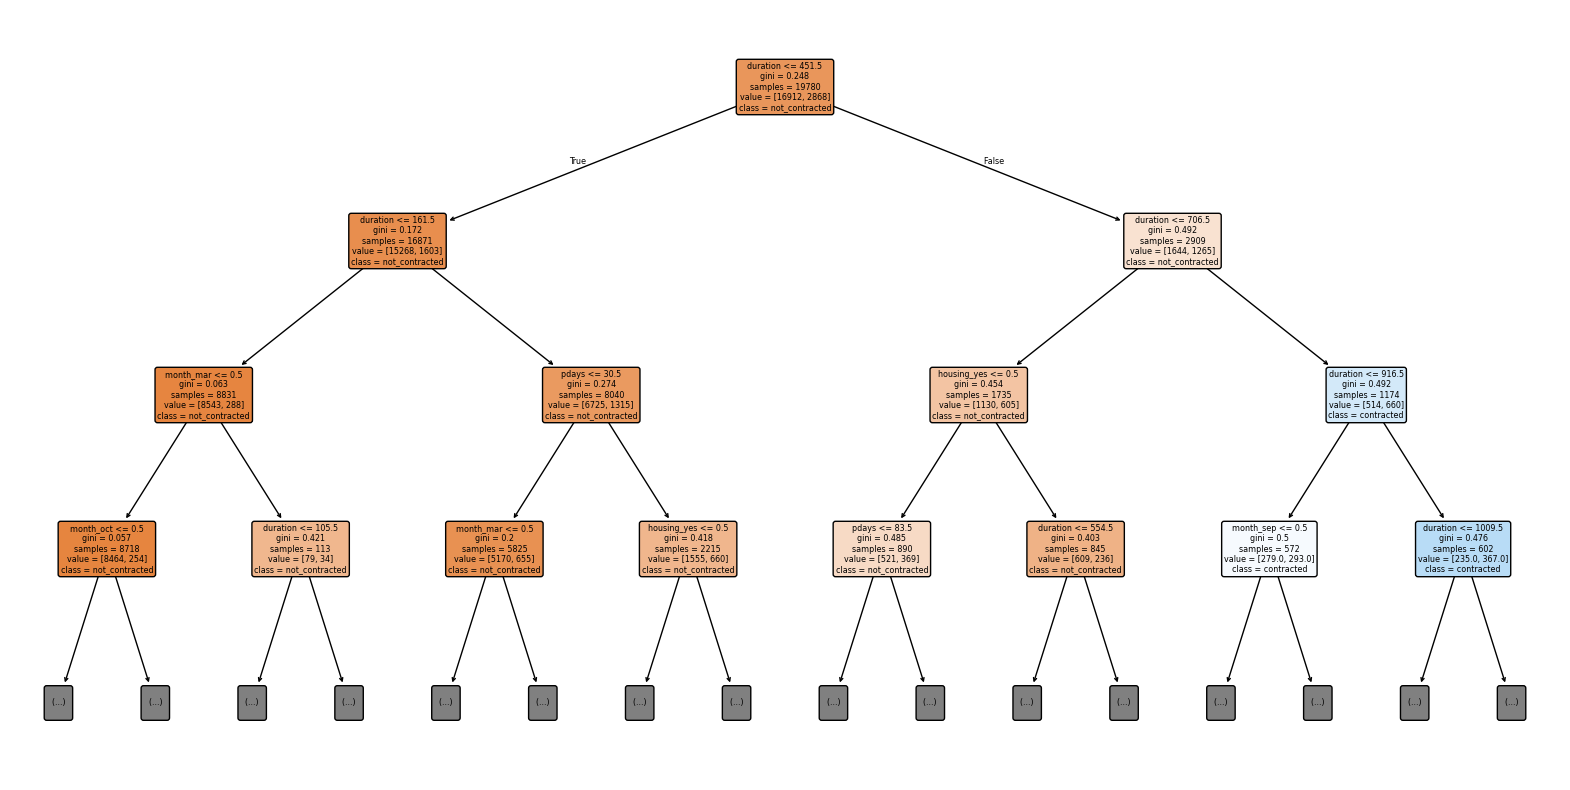

In [8]:
fig = plt.figure(figsize=(20, 10))

tree.plot_tree(
    clf, max_depth=3, feature_names=clf.feature_names_in_, class_names=['not_contracted', 'contracted'], 
    filled=True, rounded=True
)

plt.savefig('./figures/decisiontree_include_duration.png', dpi=300)
plt.show()

## Decision Tree Classifier explicit duration

In [9]:
# split trainval data and test data
trainval = df.loc[:, ~df.columns.isin(['y_yes', 'saving', 'debt', 'duration'])]
# trainval = df.loc[:, ~df.columns.isin(['y_yes', 'balance', 'duration'])]

X_trainval, X_test, y_trainval, y_test = train_test_split(trainval, df['y_yes'], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

In [10]:
clf = DecisionTreeClassifier(
    criterion='gini', splitter='best',
    random_state=0
)
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
val_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {val_accuracy:.2f}')
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.79
              precision    recall  f1-score   support

       False       0.88      0.87      0.88      5288
        True       0.29      0.31      0.30       894

    accuracy                           0.79      6182
   macro avg       0.59      0.59      0.59      6182
weighted avg       0.80      0.79      0.79      6182



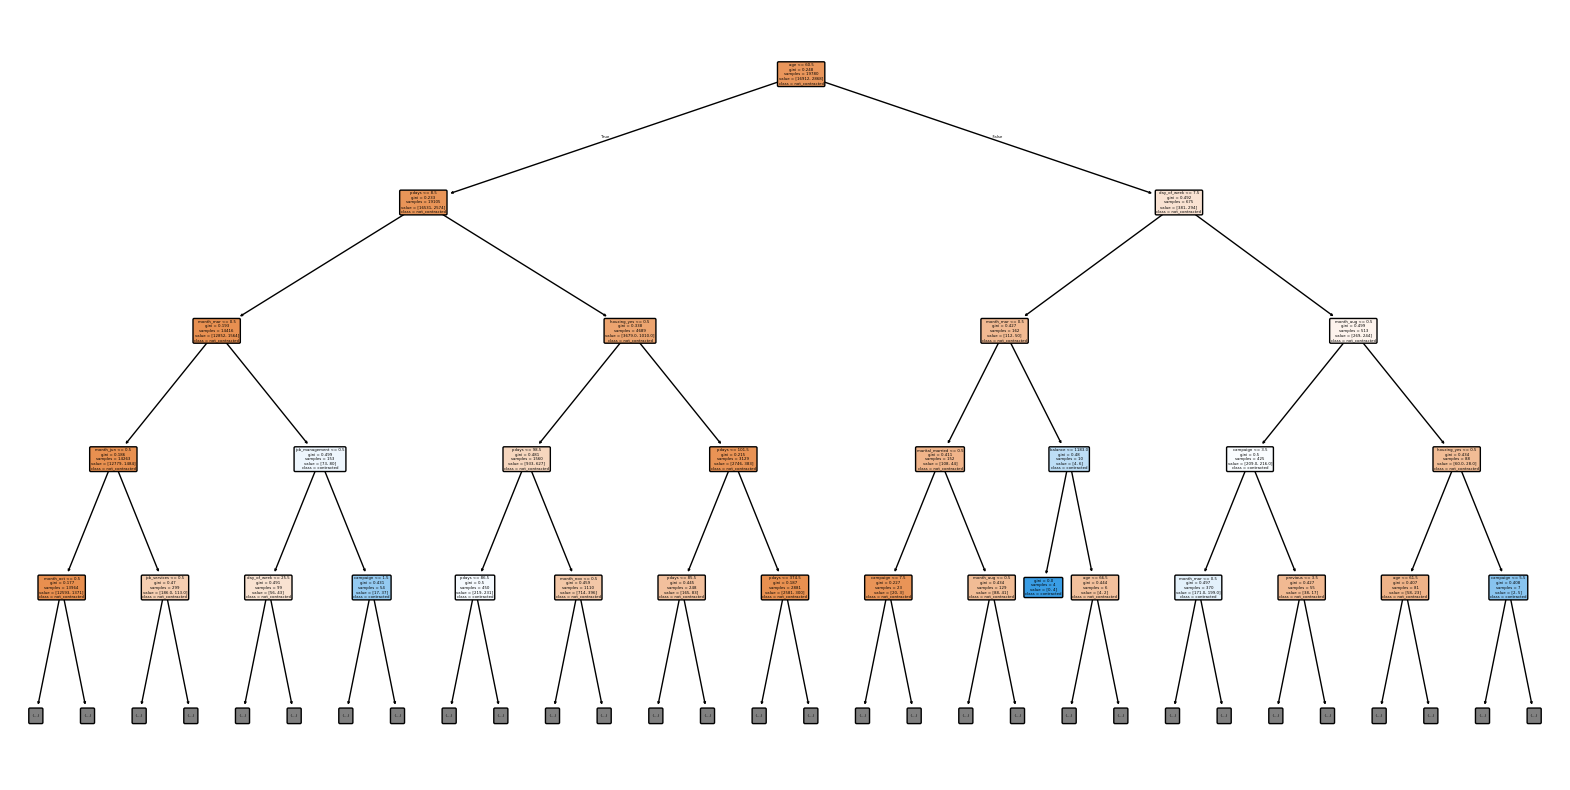

In [11]:
fig = plt.figure(figsize=(20, 10))

tree.plot_tree(
    clf, max_depth=4, feature_names=clf.feature_names_in_, class_names=['not_contracted', 'contracted'], 
    filled=True, rounded=True
)

plt.savefig('./figures/decisiontree_exclude_duration.png', dpi=300)
plt.show()

/tmp/ipykernel_77302/999304368.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 1], [0, 1], 'k--', color=sub_color, label='Random Guessing')


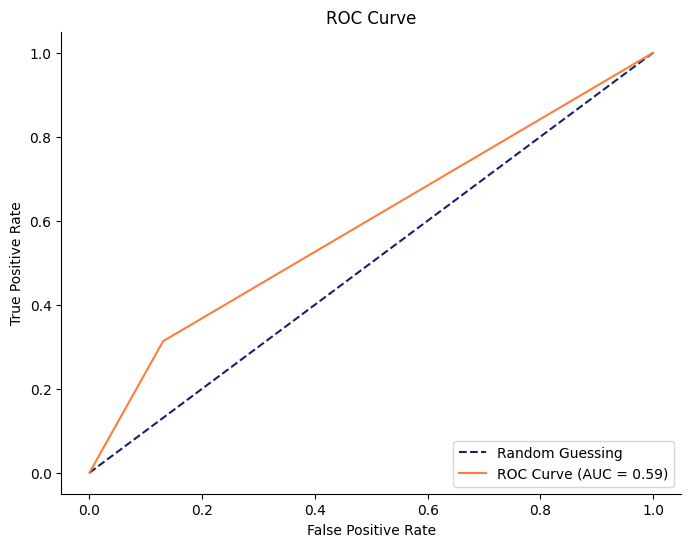

In [12]:
# 決定木のモデルで予測確率を計算 (クラス1の確率)
y_test_proba = clf.predict_proba(X_test)[:, 1]

# ROC曲線の値を計算
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# AUC（Area Under the Curve）を計算
roc_auc = auc(fpr, tpr)

# プロットの設定
plt.figure(figsize=(8, 6))
ax = plt.gca()

# 右と上の枠線（spines）を非表示にする
[ax.spines[spine].set_visible(False) for spine in ['right', 'top']]

# ROC曲線のプロット
ax.plot([0, 1], [0, 1], 'k--', color=sub_color, label='Random Guessing')
ax.plot(fpr, tpr, color=main_color, label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')

# プロットの表示
plt.show()

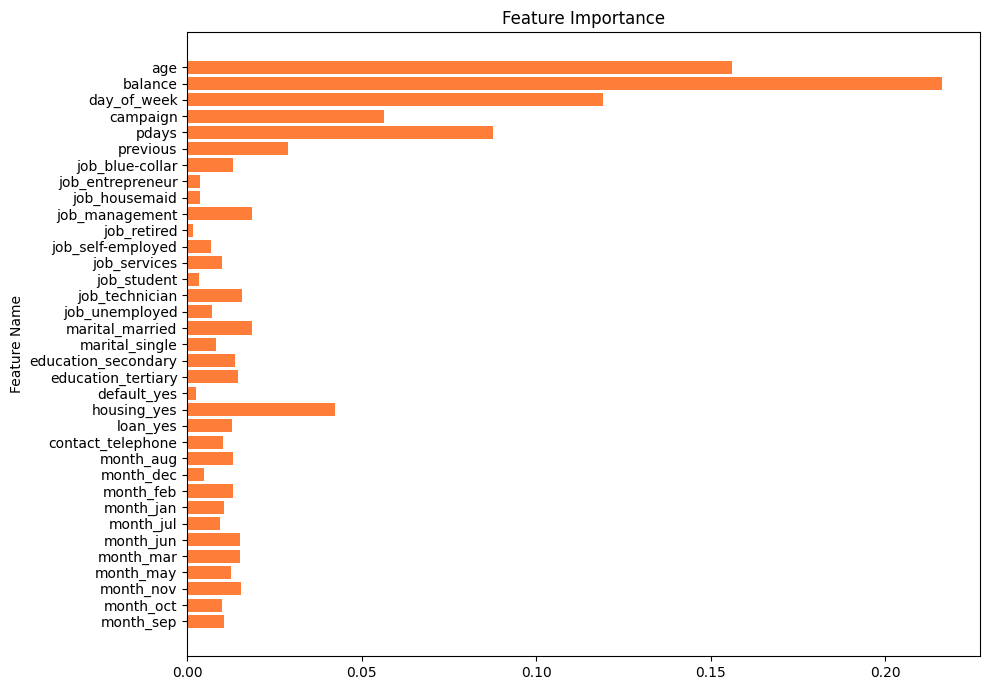

In [13]:
feature_importance= {}
[feature_importance.update([(key, value)]) for key, value in zip(clf.feature_names_in_, clf.feature_importances_)]

importance_feature_list = []
feature_list = []
for key, value in feature_importance.items():
    feature_list.append(key)
    if value >= 0.01:
        importance_feature_list.append(key)
        
fig, ax = plt.subplots(figsize=((10, 7)))

ax.barh(y=feature_list[::-1], width=list(feature_importance.values())[::-1], color=main_color)
ax.set_xlabel('')
ax.set_ylabel('Feature Name')
ax.set_title('Feature Importance')
plt.tight_layout()

### Feature Engineering

#### 特徴量を減らしてみる

In [14]:
feature_importance= {}
[feature_importance.update([(key, value)]) for key, value in zip(clf.feature_names_in_, clf.feature_importances_)]

importance_feature_list = []
for key, value in feature_importance.items():
    if value >= 0.01:
        importance_feature_list.append(key)
        
importance_feature_list

['age',
 'balance',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'job_blue-collar',
 'job_management',
 'job_technician',
 'marital_married',
 'education_secondary',
 'education_tertiary',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_feb',
 'month_jan',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep']

In [15]:
# split trainval data and test data
trainval = df.loc[:, df.columns.isin(importance_feature_list)]

X_trainval, X_test, y_trainval, y_test = train_test_split(trainval, df['y_yes'], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

In [16]:
clf = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth=3, min_samples_leaf=3, 
    random_state=0
)
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
val_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {val_accuracy:.2f}')
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.85
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      5288
        True       0.42      0.09      0.15       894

    accuracy                           0.85      6182
   macro avg       0.64      0.54      0.53      6182
weighted avg       0.80      0.85      0.81      6182



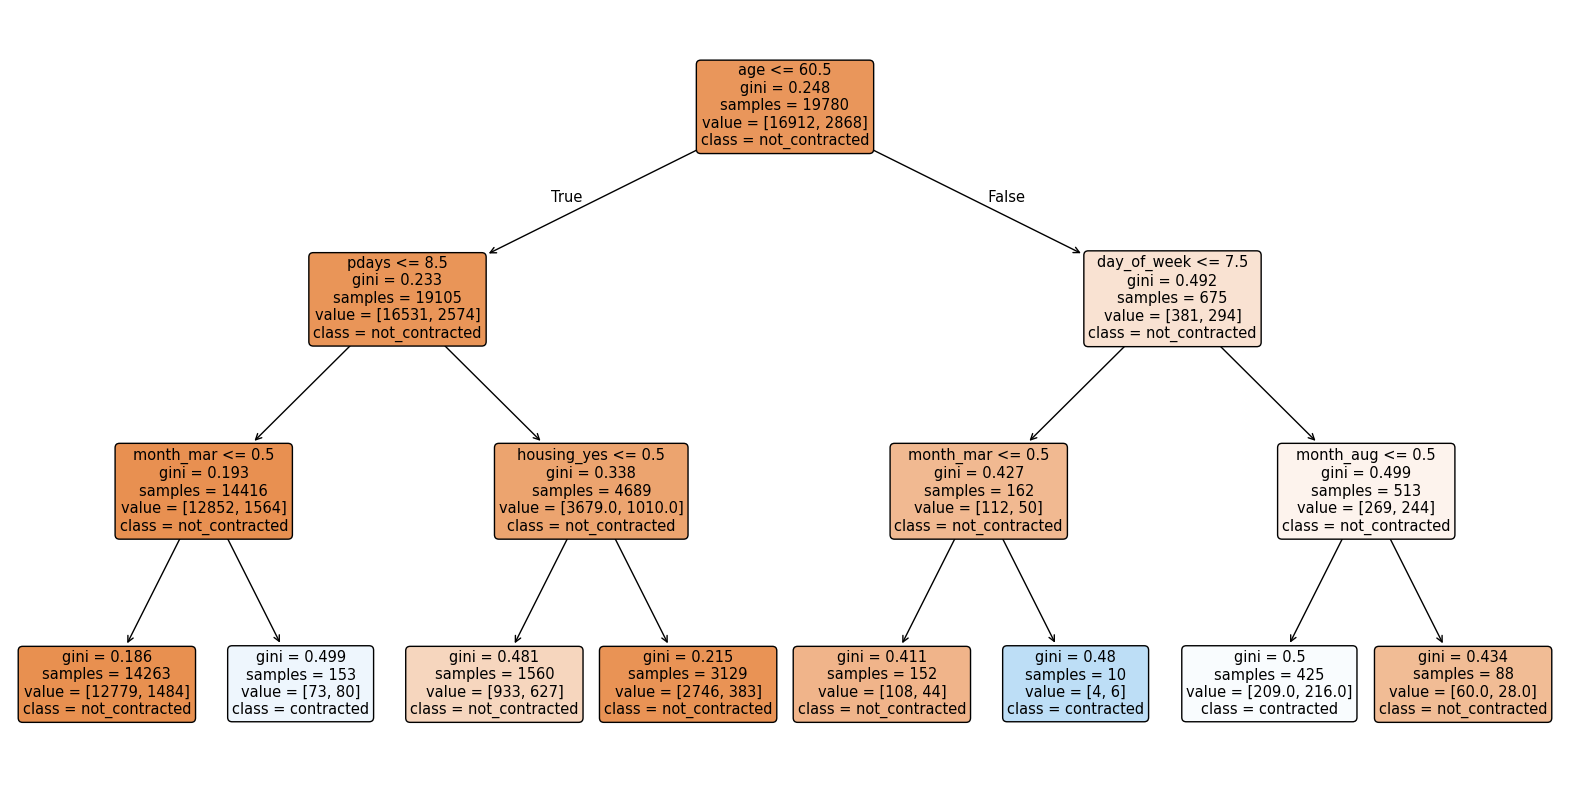

In [17]:
fig = plt.figure(figsize=(20, 10))

tree.plot_tree(
    clf, feature_names=clf.feature_names_in_, class_names=['not_contracted', 'contracted'], 
    filled=True, rounded=True
)

plt.savefig('./figures/decisiontree_reduced_features.png', dpi=300)
plt.show()

/tmp/ipykernel_77302/1754425674.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color=sub_color, label='Random Guessing')


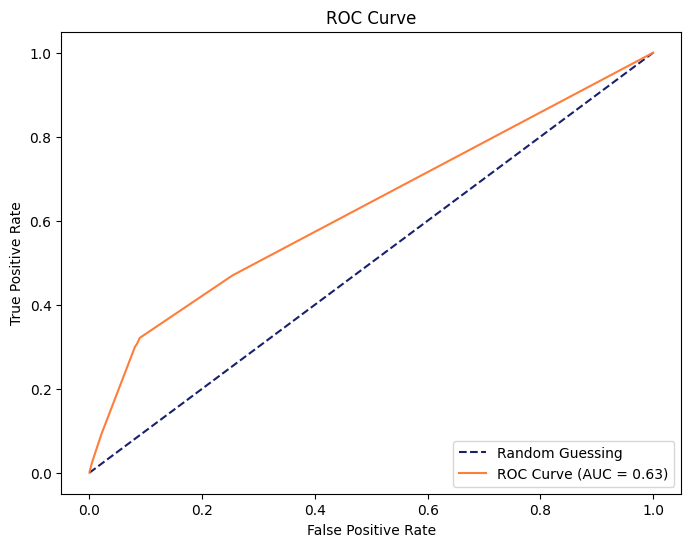

In [18]:
# 決定木のモデルで予測確率を計算 (クラス1の確率)
y_test_proba = clf.predict_proba(X_test)[:, 1]

# ROC曲線の値を計算
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# AUC（Area Under the Curve）を計算
roc_auc = auc(fpr, tpr)

# ROC曲線のプロット
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', color=sub_color, label='Random Guessing')
plt.plot(fpr, tpr, color=main_color, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()